### Catalan Numbers

The Catalan numbers $C_n$ are a sequence of integers 1, 1, 2, 5, 14, 42, 132, ..., that play an important role in quantum mechanics and the theory of disordered systems.  (They were central to Eugene Wigner's proof of the so-called semicircle law.)  They are given by
$$
C_0 = 1,\qquad C_{n+1} = {\frac{4n+2}{n+2}}\,C_n.
$$
Write a program that prints in increasing order all Catalan numbers less than or equal to one billion. Plot your result ($C_n$ vs $n$).

1
1.0
2.0
5.0
14.0
42.0
132.0
429.0
1430.0
4862.0
16796.0
58786.0
208012.0
742900.0
2674440.0
9694845.0
35357670.0
129644790.0
477638700.0


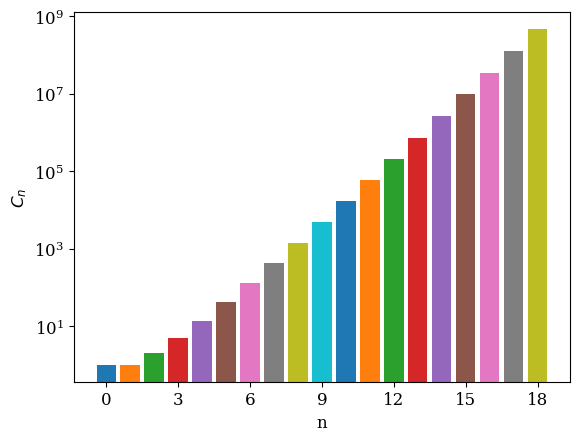

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots()

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12

cn = 1
n  = 0

while(cn<1e9):
    print(cn)
    ax.bar(n,cn)
    cn *= (4*n+2)/(n+2)
    n += 1
ax.set_yscale('log')
ax.set_ylabel(r'$C_n$')
ax.set_xlabel('n')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # making sure only integer ticks show up on x-axis since n is an integer

### Binomial coefficients and Pascal's triangle

The binomial coefficient ${n\choose k}$ is an integer equal to 
$$      {n\choose k} = \frac{n!}{k!(n-k)!} = \frac{n\times(n-1)\times(n-2)\times\ldots\times(n-k+1)}{1\times2\times\ldots\times k}
$$
when $k\ge1$, or ${n\choose0}=1$ when $k=0$. Using this form for the binomial coefficient, write a user-defined function `binomial(n,k)` that calculates the binomial coefficient for given $n$ and $k$. Make sure your function returns the answer in the form of an integer (not a float) and gives the correct value of 1 for the case where $k=0$.  

Now, using your function write a program to print out the first 20 lines of "Pascal's triangle".  The $n$th line of Pascal's triangle contains $n+1$ numbers, which are the coefficients ${n\choose 0}$, ${n\choose1}$, and so on up to ${n\choose n}$. Thus, the first few lines are  
    1 1   
    1 2 1   
    1 3 3 1   
    1 4 6 4 1   
**Note:** Print the numbers exactly as shown above, i.e. with spaces between the digits.

In [25]:
from math import factorial as f

def binomial(n,k):
    if k==0:
        return 1
    else:
        return f(n)//(f(k)*f(n-k))    # using built-in factorial function from math library

N = 20
for i in range(1,N+1):
    s = ""
    for j in range(i+1):
        s += str(binomial(i,j))+" "
    print(s)

1 1 
1 2 1 
1 3 3 1 
1 4 6 4 1 
1 5 10 10 5 1 
1 6 15 20 15 6 1 
1 7 21 35 35 21 7 1 
1 8 28 56 70 56 28 8 1 
1 9 36 84 126 126 84 36 9 1 
1 10 45 120 210 252 210 120 45 10 1 
1 11 55 165 330 462 462 330 165 55 11 1 
1 12 66 220 495 792 924 792 495 220 66 12 1 
1 13 78 286 715 1287 1716 1716 1287 715 286 78 13 1 
1 14 91 364 1001 2002 3003 3432 3003 2002 1001 364 91 14 1 
1 15 105 455 1365 3003 5005 6435 6435 5005 3003 1365 455 105 15 1 
1 16 120 560 1820 4368 8008 11440 12870 11440 8008 4368 1820 560 120 16 1 
1 17 136 680 2380 6188 12376 19448 24310 24310 19448 12376 6188 2380 680 136 17 1 
1 18 153 816 3060 8568 18564 31824 43758 48620 43758 31824 18564 8568 3060 816 153 18 1 
1 19 171 969 3876 11628 27132 50388 75582 92378 92378 75582 50388 27132 11628 3876 969 171 19 1 
1 20 190 1140 4845 15504 38760 77520 125970 167960 184756 167960 125970 77520 38760 15504 4845 1140 190 20 1 


### Slower Prime numbers

Follow Example 2.8 in the book and write a very basic "brute-force" code to print the prime numbers up to 10,000. Plot them as histograms on the number line. Additionally, record the time taken to execute this code.

Time for code execution: 1.00948166847229 seconds


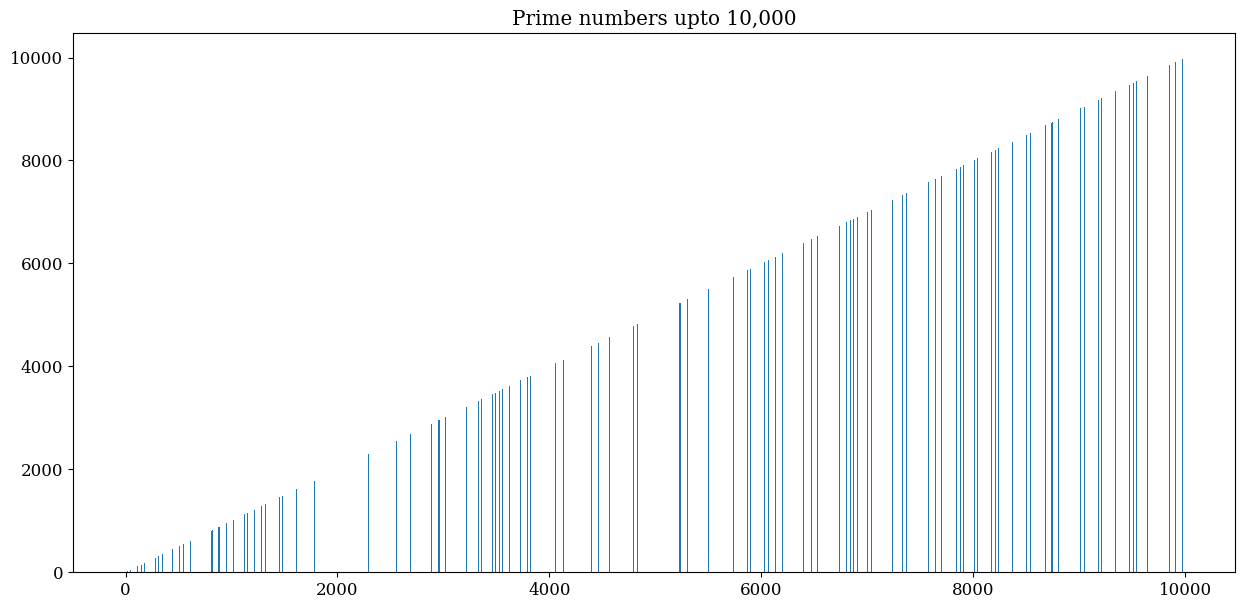

In [52]:
import time

def factors(n):
    factorlist = []
    k = 2
    while k<=n:   # check for factors from 2 to n
        while n%k==0:   # checking if k divides n
            factorlist.append(k)
            n //= k     # updating the value of n with the dividend, need not go all the way to n
        k += 1
    return factorlist

plt.figure(figsize=(15,7))

pnum = 2
primes =  []
N = 10000

start = time.time()
while(pnum < N):
    f = factors(pnum)
    if len(f) == 1:
        primes.append(pnum)
    pnum += 1
end = time.time()-start

plt.bar(primes,primes)
plt.title('Prime numbers upto 10,000')
print("Time for code execution:",end,"seconds")

### Faster Prime numbers

The above program is not a very efficient way of calculating prime numbers: it checks each number to see if it is divisible by any number less than it.  We can develop a much faster program for prime numbers by making use of the following observations:
* A number $n$ is prime if it has no prime factors less than $n$. Hence we only need to check if it is divisible by other primes.
* If a number $n$ is non-prime, having a factor $r$, then $n=rs$, where $s$ is also a factor.  If $r\geq\sqrt{n}$ then $n = rs \geq \sqrt{n}s$, which implies that $s\leq\sqrt{n}$.  In other words, any non-prime must have factors, and hence also prime factors, less than or equal to $\sqrt{n}$. Thus, to determine if a number is prime we have to check its prime factors only up to and including $\sqrt{n}$---if there are none then the number is prime.
* If we find even a single prime factor less than $\sqrt{n}$ then we know that the number is non-prime, and hence there is no need to check any further---we can abandon this number and move on to something else.

Write a Python program that finds all the primes up to 10,000. Create a list to store the primes, which starts out with just the one prime number 2 in it.  Then for each number $n$ from 3 to $10\,000$, check whether the number is divisible by any of the primes in the list up to and including $\sqrt{n}$.  As soon as you find a single prime factor you can stop checking the rest of them---you know $n$ is not a prime.  If you find no prime factors $\sqrt{n}$ or less then $n$ is prime and you should add it to the list.  You can print out the list all in one go at the end of the program, or you can print out the individual numbers as you find them. Compare time of execution with the previous program.

In [53]:
primes = [2]

start = time.time()
for i in range(3,10000):
    div = 0
    for p in primes:
        if p>np.sqrt(i):   # checking primes upto square root n
            break
        if i%p==0:         # exiting this loop if one prime number divides our number
            div = 1
            break
    if div==0:
        primes.append(i)
        print(i)
print("\nTotal time of execution",time.time()-start,"is way better than the previous",end,"seconds!")

3
5
7
11
13
17
19
23
29
31
37
41
43
47
53
59
61
67
71
73
79
83
89
97
101
103
107
109
113
127
131
137
139
149
151
157
163
167
173
179
181
191
193
197
199
211
223
227
229
233
239
241
251
257
263
269
271
277
281
283
293
307
311
313
317
331
337
347
349
353
359
367
373
379
383
389
397
401
409
419
421
431
433
439
443
449
457
461
463
467
479
487
491
499
503
509
521
523
541
547
557
563
569
571
577
587
593
599
601
607
613
617
619
631
641
643
647
653
659
661
673
677
683
691
701
709
719
727
733
739
743
751
757
761
769
773
787
797
809
811
821
823
827
829
839
853
857
859
863
877
881
883
887
907
911
919
929
937
941
947
953
967
971
977
983
991
997
1009
1013
1019
1021
1031
1033
1039
1049
1051
1061
1063
1069
1087
1091
1093
1097
1103
1109
1117
1123
1129
1151
1153
1163
1171
1181
1187
1193
1201
1213
1217
1223
1229
1231
1237
1249
1259
1277
1279
1283
1289
1291
1297
1301
1303
1307
1319
1321
1327
1361
1367
1373
1381
1399
1409
1423
1427
1429
1433
1439
1447
1451
1453
1459
1471
1481
1483
1487
1489
1493
1499
1511